# Projet Machine Learning - Campagne Marketing Bancaire

**Dataset:** Bank Marketing (UCI Repository)

## Objectif
Prédire si un client va souscrire à un dépôt à terme suite à une campagne téléphonique.

## Plan
1. Exploration des données
2. Preprocessing
3. Modélisation (5 algos)
4. Comparaison des résultats

## 1. Présentation du Problème

Une banque portugaise a fait des campagnes de télémarketing pour vendre des dépôts à terme.

**Objectif** : Prédire si un client va souscrire (oui/non) → problème de classification binaire

**Données disponibles :**
- Infos client : age, job, education, etc.
- Infos campagne : nombre de contacts, mois, résultat précédent
- Infos économiques : taux d'emploi, euribor, etc.

**Algorithmes testés :**
1. Régression Logistique
2. Arbre de Décision
3. Naive Bayes
4. Perceptron
5. KNN

**Métriques** : Accuracy, Precision, Recall, F1-Score, ROC-AUC

Note : On va retirer la variable "duration" car elle n'est connue qu'après l'appel.

## 2. Import et Chargement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix, roc_curve, auc)
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("Imports OK")

Imports OK


In [2]:
# Chargement du dataset
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
print(f"Dataset chargé : {df.shape[0]} lignes, {df.shape[1]} colonnes")

Dataset chargé : 41188 lignes, 21 colonnes


## 3. Exploration des Données

In [10]:
# Apercu des données
print("Apercu des données")

df.head(10)

Apercu des données


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Infos générales
print("Infos dataset :")
print(df.info())
print("\nStats :")
df.describe()

Infos dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx  

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
# Valeurs manquantes
missing = df.isnull().sum()
if missing.sum() == 0:
    print("Pas de valeurs manquantes")
else:
    print(missing[missing > 0])

Pas de valeurs manquantes


Distribution :
y
no     36548
yes     4640
Name: count, dtype: int64

Proportions :
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


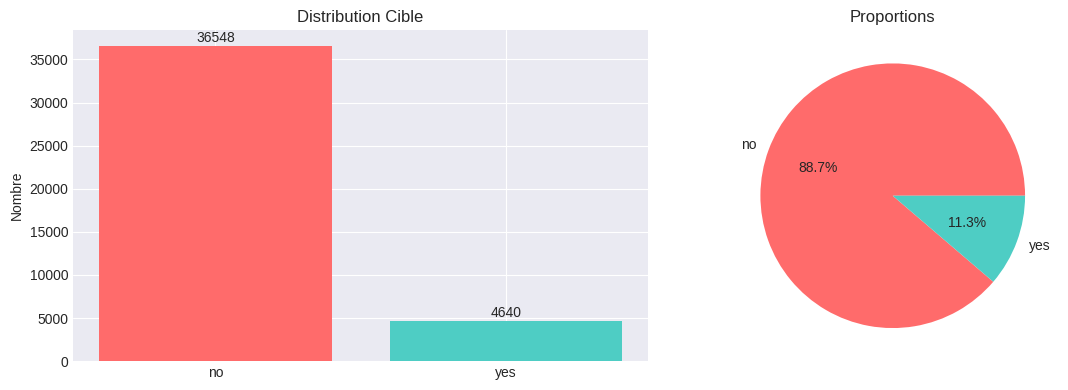


Ratio déséquilibre : 7.9 (no/yes)
Classes très déséquilibrées, faudra en tenir compte


In [13]:
# Distribution variable cible
target_counts = df['y'].value_counts()
print("Distribution :")
print(target_counts)
print(f"\nProportions :\n{df['y'].value_counts(normalize=True)*100}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(target_counts.index, target_counts.values, color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Distribution Cible')
axes[0].set_ylabel('Nombre')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 500, str(v), ha='center')

axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
            colors=['#ff6b6b', '#4ecdc4'])
axes[1].set_title('Proportions')

plt.tight_layout()
plt.show()

ratio = target_counts['no'] / target_counts['yes']
print(f"\nRatio déséquilibre : {ratio:.1f} (no/yes)")
print("Classes très déséquilibrées, faudra en tenir compte")

In [16]:
# Variables catégorielles
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('y')

print(f"Variables catégorielles : {cat_cols}\n")

# Nombre de catégories
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} catégories")
    
# Valeurs inconnues
print("\nValeurs unkonwn :")
for col in cat_cols:
    unknown = (df[col] == 'unknown').sum()
    if unknown > 0:
        print(f"{col}: {unknown} ({unknown/len(df)*100:.1f}%)")

Variables catégorielles : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

job: 12 catégories
marital: 4 catégories
education: 8 catégories
default: 3 catégories
housing: 3 catégories
loan: 3 catégories
contact: 2 catégories
month: 10 catégories
day_of_week: 5 catégories
poutcome: 3 catégories

Valeurs unkonwn :
job: 330 (0.8%)
marital: 80 (0.2%)
education: 1731 (4.2%)
default: 8597 (20.9%)
housing: 990 (2.4%)
loan: 990 (2.4%)


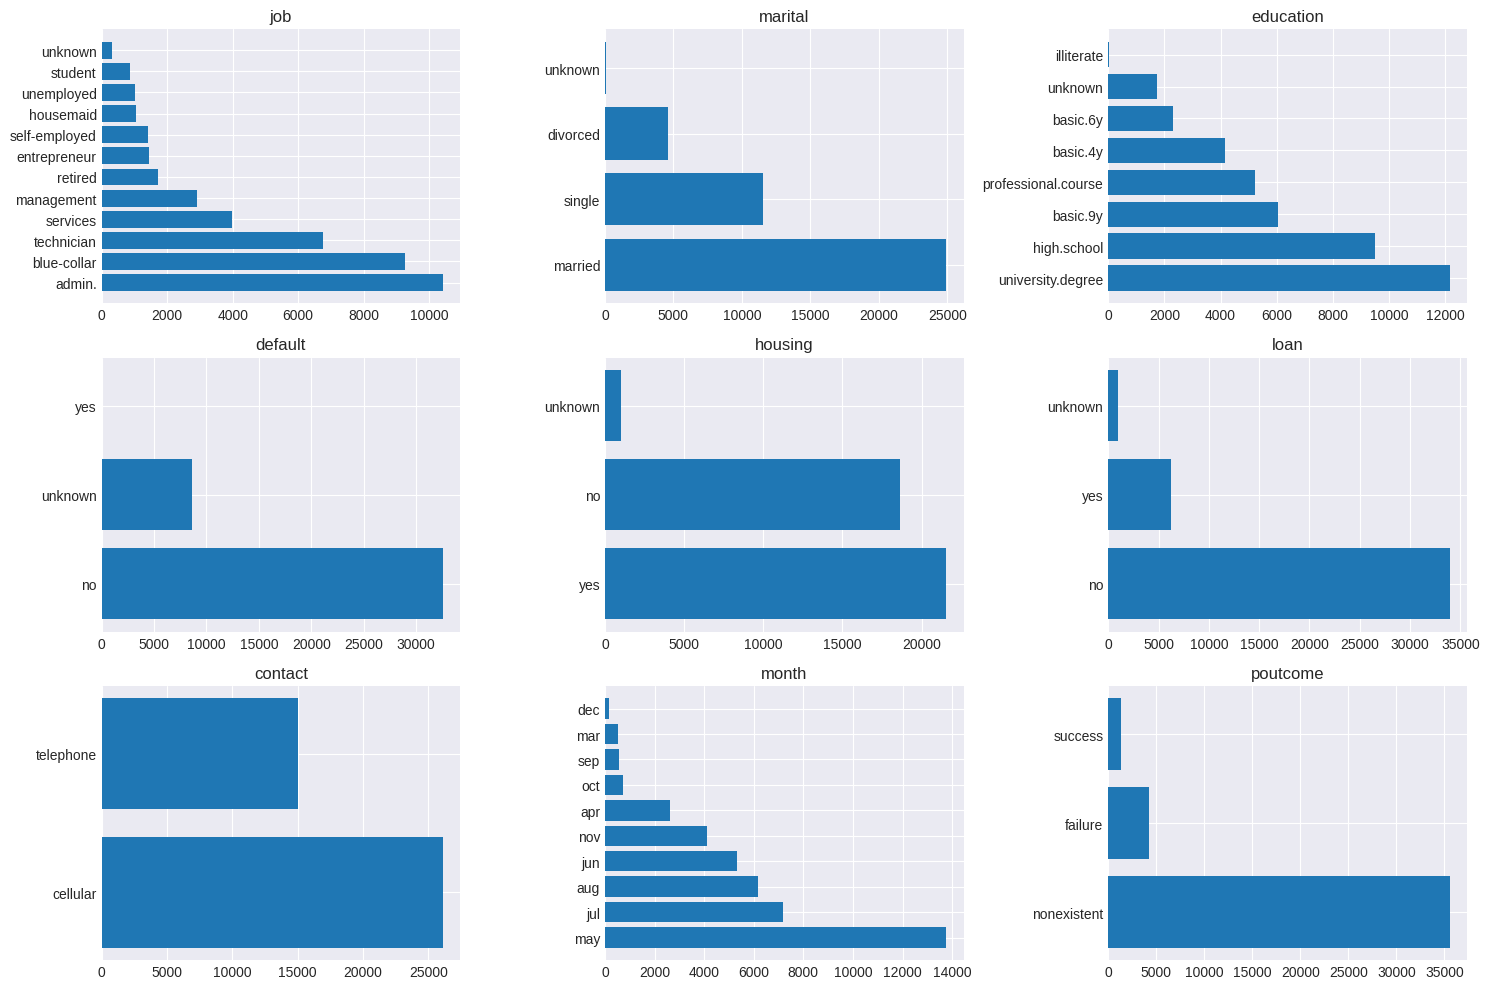

In [18]:
# Visualisation variables catégorielles
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

cols_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for idx, col in enumerate(cols_plot):
    counts = df[col].value_counts()
    axes[idx].barh(range(len(counts)), counts.values)
    axes[idx].set_yticks(range(len(counts)))
    axes[idx].set_yticklabels(counts.index)
    axes[idx].set_title(col)
    
plt.tight_layout()
plt.show()

In [20]:
# variables numeriques
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numériques : {num_cols}\n")
df[num_cols].describe().T

Variables numériques : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']



,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


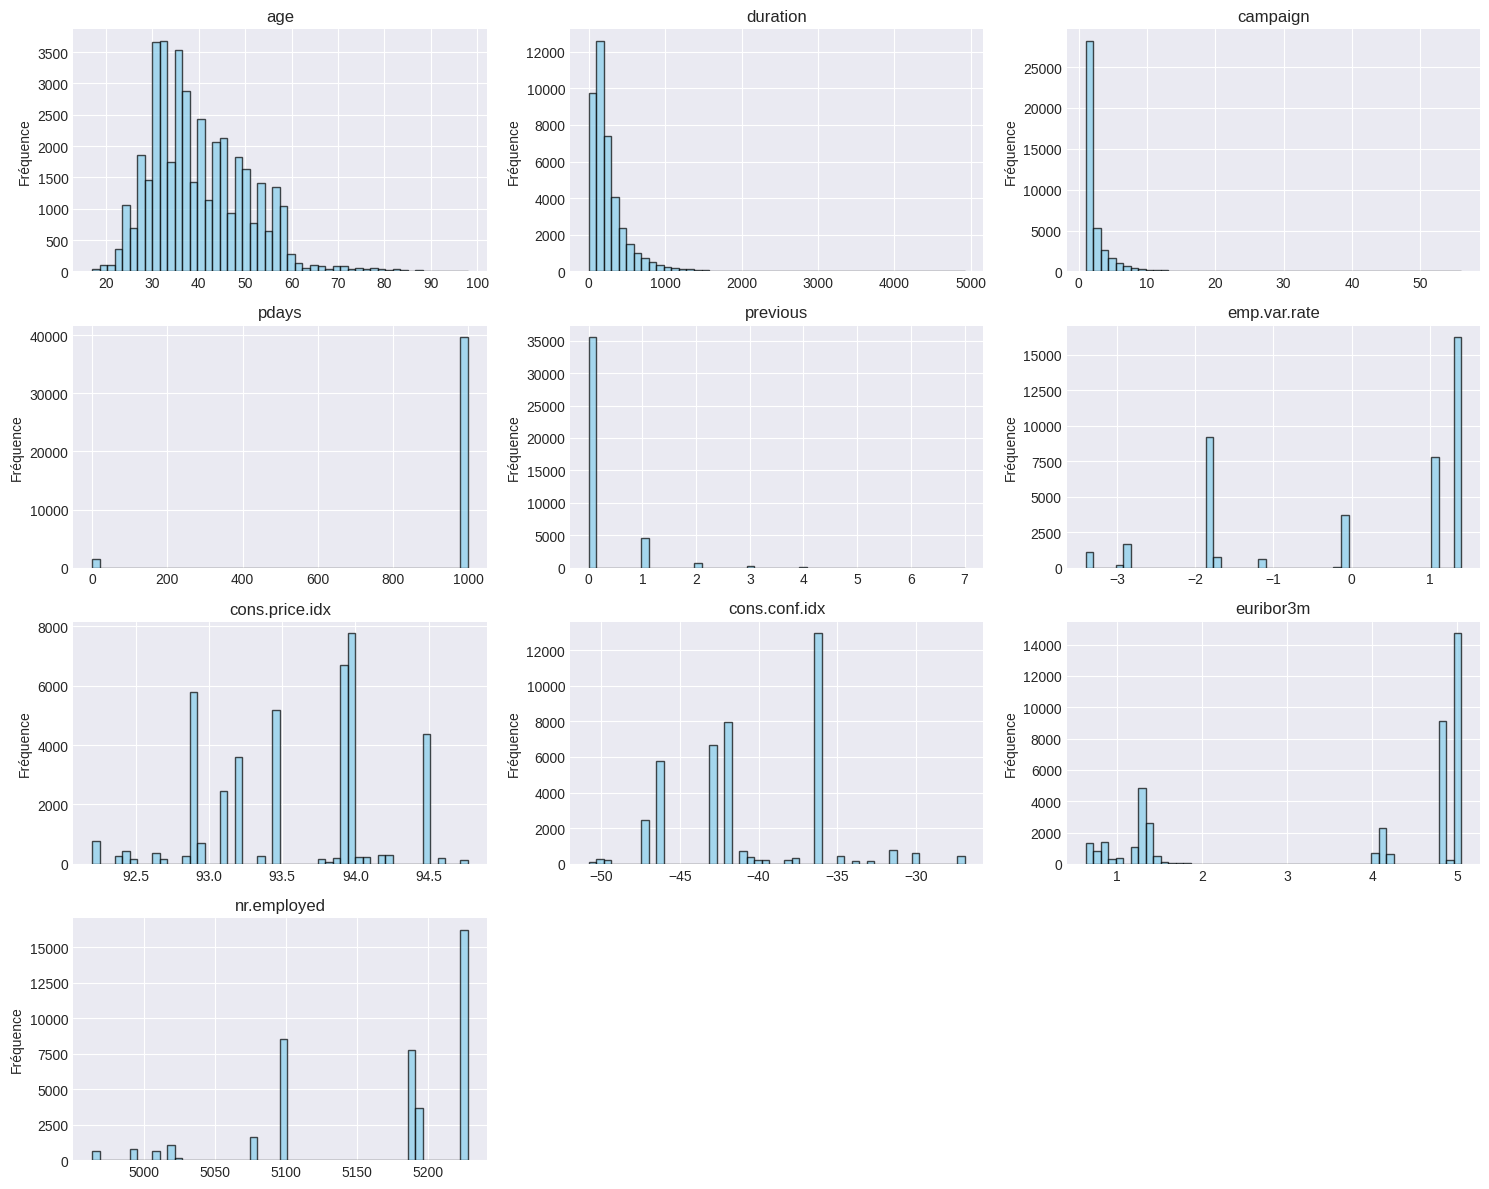

In [25]:
# Distribution variables numériques
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    axes[idx].hist(df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Fréquence')
    
for idx in range(len(num_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

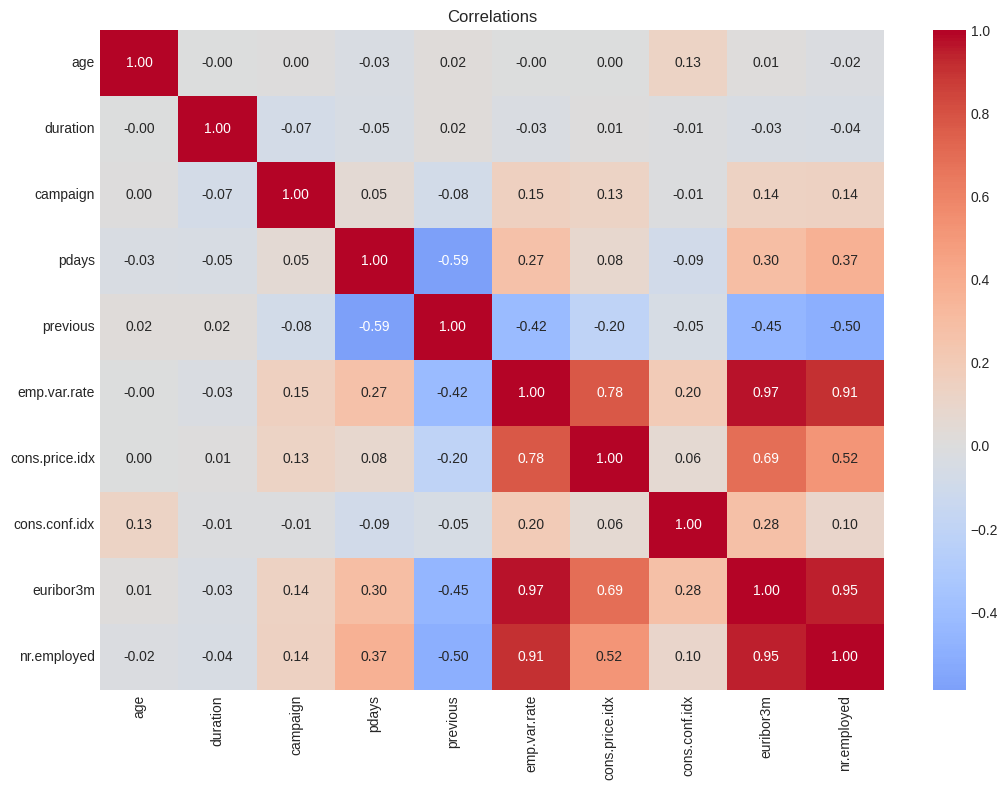

Correlations fortes (>0.7) :
emp.var.rate <-> cons.price.idx: 0.78
emp.var.rate <-> euribor3m: 0.97
emp.var.rate <-> nr.employed: 0.91
euribor3m <-> nr.employed: 0.95


In [28]:
# Correlations
plt.figure(figsize=(11, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlations')
plt.tight_layout()
plt.show()

# Correlations fortes
print("Correlations fortes (>0.7) :")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.7:
            print(f"{corr.columns[i]} <-> {corr.columns[j]}: {corr.iloc[i, j]:.2f}")

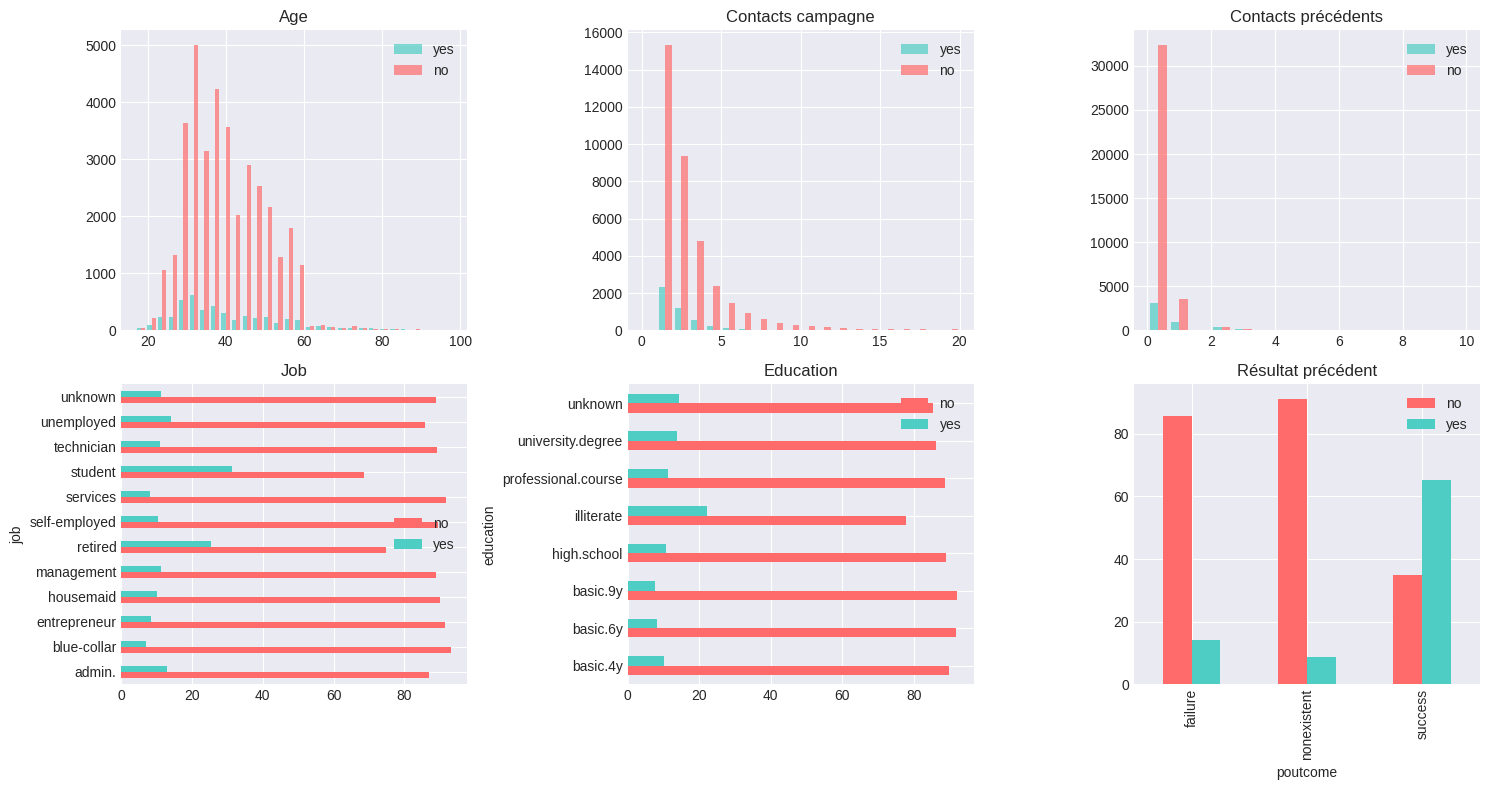

In [30]:
# Relation features / cible
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Age
axes[0, 0].hist([df[df['y']=='yes']['age'], df[df['y']=='no']['age']], 
                bins=30, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7)
axes[0, 0].set_title('Age')
axes[0, 0].legend()

# Campaign
axes[0, 1].hist([df[df['y']=='yes']['campaign'], df[df['y']=='no']['campaign']], 
                bins=20, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7, range=(0, 20))
axes[0, 1].set_title('Contacts campagne')
axes[0, 1].legend()

# Previous
axes[0, 2].hist([df[df['y']=='yes']['previous'], df[df['y']=='no']['previous']], 
                bins=15, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7, range=(0, 10))
axes[0, 2].set_title('Contacts précédents')
axes[0, 2].legend()

#job
job_target = pd.crosstab(df['job'], df['y'], normalize='index') * 100
job_target.plot(kind='barh', ax=axes[1, 0], color=['#ff6b6b', '#4ecdc4'])
axes[1, 0].set_title('Job')
axes[1, 0].legend(['no', 'yes'])

# Education
edu_target = pd.crosstab(df['education'], df['y'], normalize='index') * 100
edu_target.plot(kind='barh', ax=axes[1, 1], color=['#ff6b6b', '#4ecdc4'])
axes[1, 1].set_title('Education')
axes[1, 1].legend(['no', 'yes'])

# Poutcome
pout_target = pd.crosstab(df['poutcome'], df['y'], normalize='index') * 100
pout_target.plot(kind='bar', ax=axes[1, 2], color=['#ff6b6b', '#4ecdc4'])
axes[1, 2].set_title('Résultat précédent')
axes[1, 2].legend(['no', 'yes'])

plt.tight_layout()
plt.show()

**Observations :**
- Classes très déséquilibrées (~88% no et ~11% yes)
- Certaines variables ont des "unknown"
- Corrélations fortes entre variables économiques, donc possible redondance
- La variable "duration" ne sert pas a grand chose car elle est connue après l'appel
- Le résultat de la campagne précédente est important

## 4. Preprocessing

In [37]:
df_processed = df.copy()

# on retire duration 
df_processed = df_processed.drop('duration', axis=1)
print("Variable duration supprimée")

df_processed['y'] = df_processed['y'].map({'no': 0, 'yes': 1})
print("Cible encodée (no=0, yes=1)")

# Identifier les types de variables
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('y')

print(f"\nCatégorielles: {categorical_features}")
print(f"Numériques: {numerical_features}")
print(f"\nShape final: {df_processed.shape}")

Variable duration supprimée
Cible encodée (no=0, yes=1)

Catégorielles: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numériques: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Shape final: (41188, 20)


In [39]:
# Encodage variables catégorielles
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} catégories")

df_processed.head()

job: 12 catégories
marital: 4 catégories
education: 8 catégories
default: 3 catégories
housing: 3 catégories
loan: 3 catégories
contact: 2 catégories
month: 10 catégories
day_of_week: 5 catégories
poutcome: 3 catégories


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [42]:
# Separation du dataset pour les étapes
X = df_processed.drop('y', axis=1)
y = df_processed['y']

print(f"X: {X.shape}, y: {y.shape}")
print(f"Classe 0: {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"Classe 1: {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain: {X_train.shape}, Test: {X_test.shape}")

X: (41188, 19), y: (41188,)
Classe 0: 36548 (88.7%)
Classe 1: 4640 (11.3%)

Train: (32950, 19), Test: (8238, 19)


In [44]:
# On normalise les features numériques
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print(f"Normalisation appliquée sur {len(numerical_features)} features")

Normalisation appliquée sur 9 features


## 5. Modélisation

On va tester 5 algorithmes et comparer leurs performances.
1. **Régression Logistique** 
2. **Decision Tree (Arbre de Décision)** 
3. **Naive Bayes** 
4. **Perceptron**
5. **K-Nearest Neighbors (KNN)**

In [47]:
# Initialisation modèles
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(class_weight='balanced', max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}


In [51]:
# Entrainement des modeles
import time

trained_models = {}
predictions = {}
prediction_probas = {}
training_times = {}

for name, model in models.items():
    print(f"\n{name}...")
    start = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start
    
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    trained_models[name] = model
    predictions[name] = y_pred
    prediction_probas[name] = y_pred_proba
    training_times[name] = train_time
    
    print(f"Temps: {train_time:.2f}s")
    print(f"Accuracy train: {model.score(X_train_scaled, y_train):.3f}")
    print(f"Accuracy test: {accuracy_score(y_test, y_pred):.3f}")

print("\nEntraînement terminé")


Logistic Regression...
Temps: 2.45s
Accuracy train: 0.810
Accuracy test: 0.813

Decision Tree...
Temps: 0.14s
Accuracy train: 0.858
Accuracy test: 0.850

Naive Bayes...
Temps: 0.01s
Accuracy train: 0.834
Accuracy test: 0.840

Perceptron...
Temps: 0.03s
Accuracy train: 0.835
Accuracy test: 0.839

KNN...
Temps: 0.01s
Accuracy train: 0.912
Accuracy test: 0.893

Entraînement terminé


## 6. Évaluation et comparaison

In [52]:
# Calcul des métriques
results = []

for name in models.keys():
    y_pred = predictions[name]
    y_pred_proba = prediction_probas[name]
    
    results.append({
        'Modèle': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None,
        'Temps (s)': training_times[name]
    })

results_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)
results_df

,Modèle,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Temps (s)
1,Decision Tree,0.849599,0.390877,0.600216,0.473438,0.761738,0.143164
0,Logistic Regression,0.812576,0.331878,0.655172,0.440580,0.795874,2.450504
2,Naive Bayes,0.839767,0.354815,0.516164,0.420544,0.773138,0.009630
4,KNN,0.893421,0.555066,0.271552,0.364689,0.727449,0.006394
3,Perceptron,0.839281,0.303181,0.328664,0.315408,NaN,0.027801


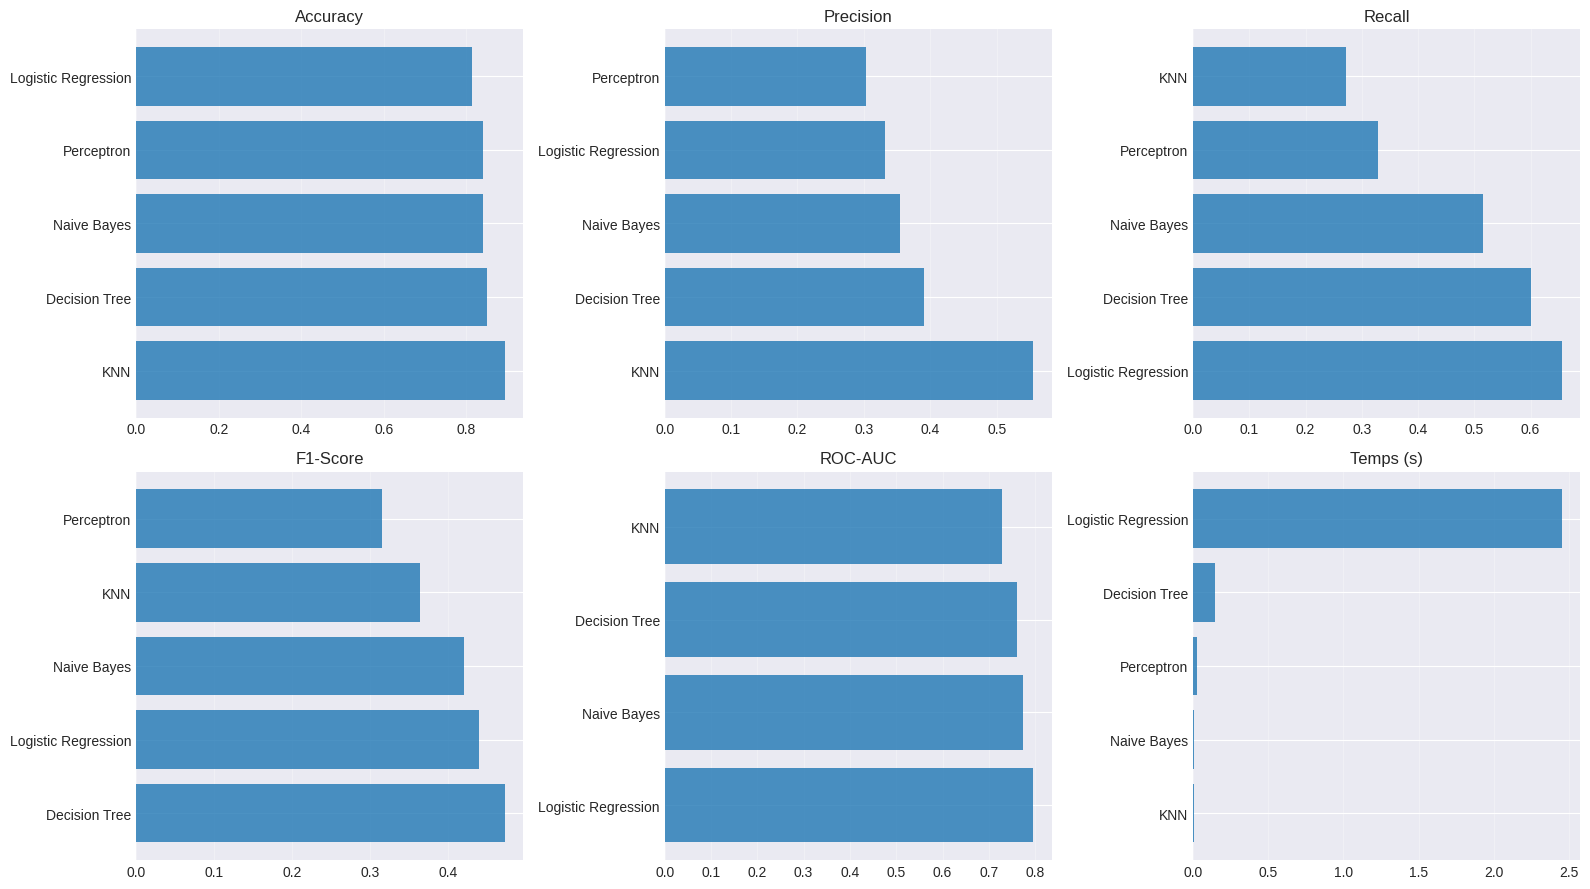

In [58]:
# visualisation des résultats
fig, axes = plt.subplots(2, 3, figsize=(16, 9))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Temps (s)']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    
    if metric == 'ROC-AUC':
        data = results_df[results_df[metric].notna()].sort_values(metric, ascending=False)
    else:
        data = results_df.sort_values(metric, ascending=False if metric != 'Temps (s)' else True)
    
    ax.barh(data['Modèle'], data[metric], alpha=0.8)
    ax.set_title(metric)
    ax.grid(axis='x', alpha=0.3)
    
plt.tight_layout()
plt.show()

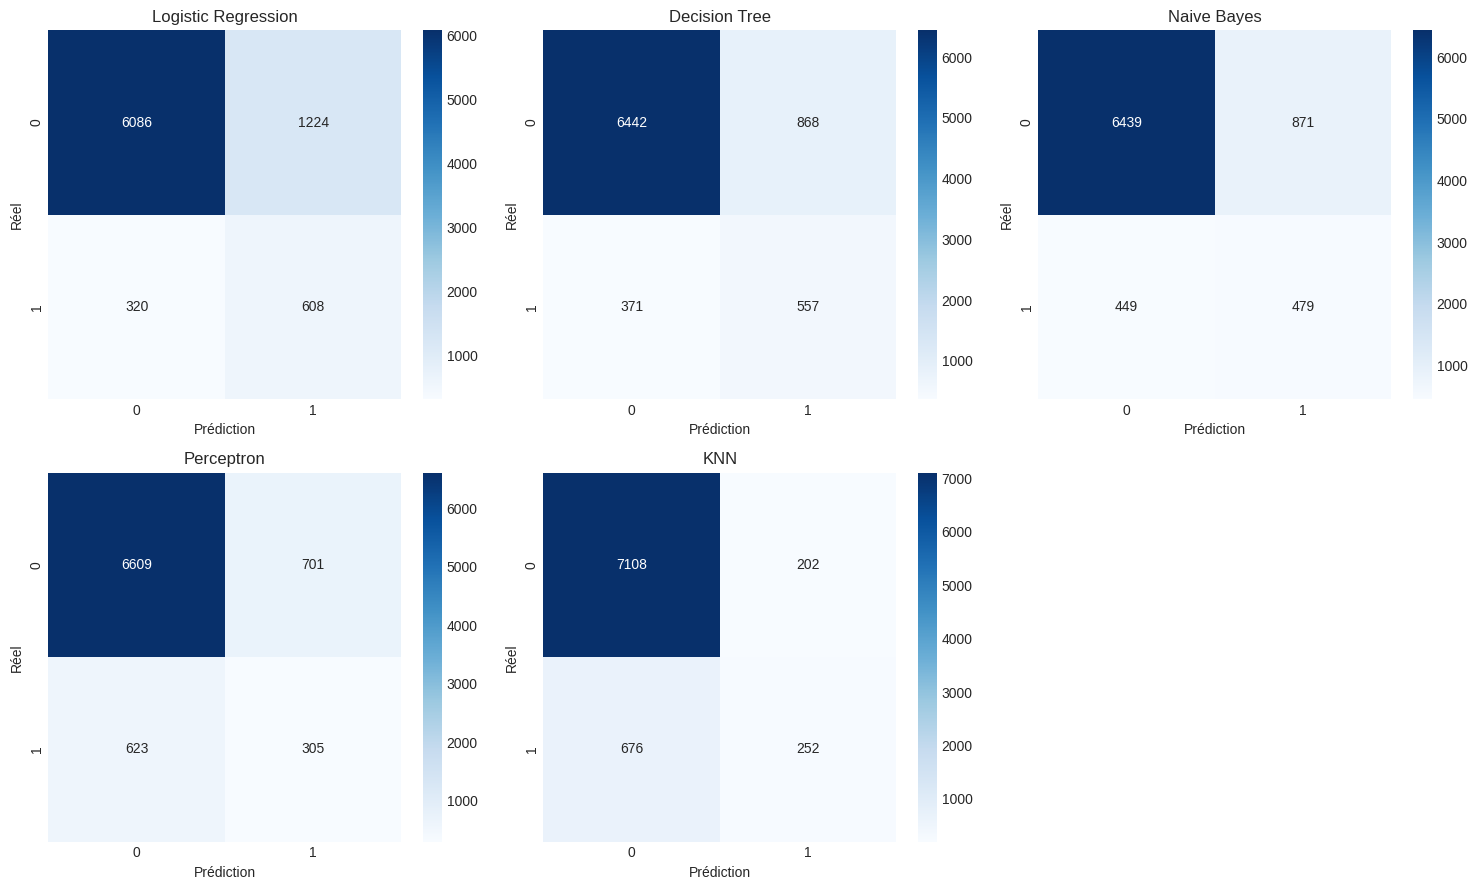

In [59]:
# Matrices de confusion TP FP TN FN
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.ravel()

for idx, name in enumerate(models.keys()):
    cm = confusion_matrix(y_test, predictions[name])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Prédiction')
    axes[idx].set_ylabel('Réel')

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

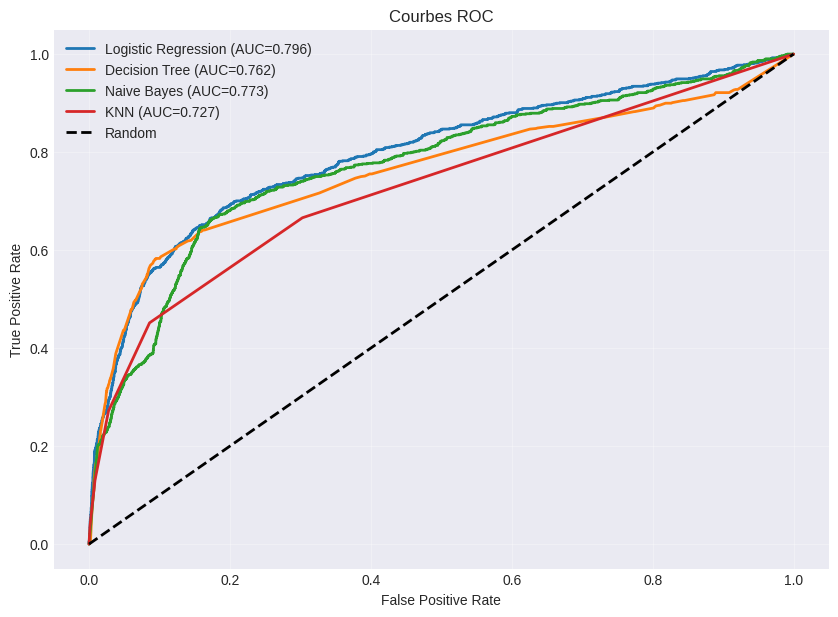

In [60]:
# Courbes ROC
plt.figure(figsize=(10, 7))

for name in models.keys():
    if prediction_probas[name] is not None:
        fpr, tpr, _ = roc_curve(y_test, prediction_probas[name])
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC={auc(fpr, tpr):.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 7. Validation Croisée

In [65]:
# Cross-validation avec 5-fold
cv_results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring='f1', n_jobs=-1)
    
    cv_results.append({
        'Modèle': name,
        'F1 Moyen': cv_scores.mean(),
        'Std': cv_scores.std(),
        'Min': cv_scores.min(),
        'Max': cv_scores.max(),
        'Scores': cv_scores
    })
    
    print(f"{name}: {cv_scores.mean():.3f} (+-{cv_scores.std():.3f})")

cv_df = pd.DataFrame(cv_results).drop('Scores', axis=1).sort_values('F1 Moyen', ascending=False)
print(f"\n{cv_df.to_string(index=False)}")

Logistic Regression: 0.429 (+-0.006)
Decision Tree: 0.431 (+-0.007)
Naive Bayes: 0.408 (+-0.009)
Perceptron: 0.326 (+-0.081)
KNN: 0.346 (+-0.017)

             Modèle  F1 Moyen      Std      Min      Max
      Decision Tree  0.431279 0.007199 0.417997 0.438579
Logistic Regression  0.429303 0.006277 0.419369 0.437239
        Naive Bayes  0.408378 0.008898 0.398273 0.418985
                KNN  0.346399 0.017479 0.329044 0.368056
         Perceptron  0.326407 0.081399 0.224092 0.433601


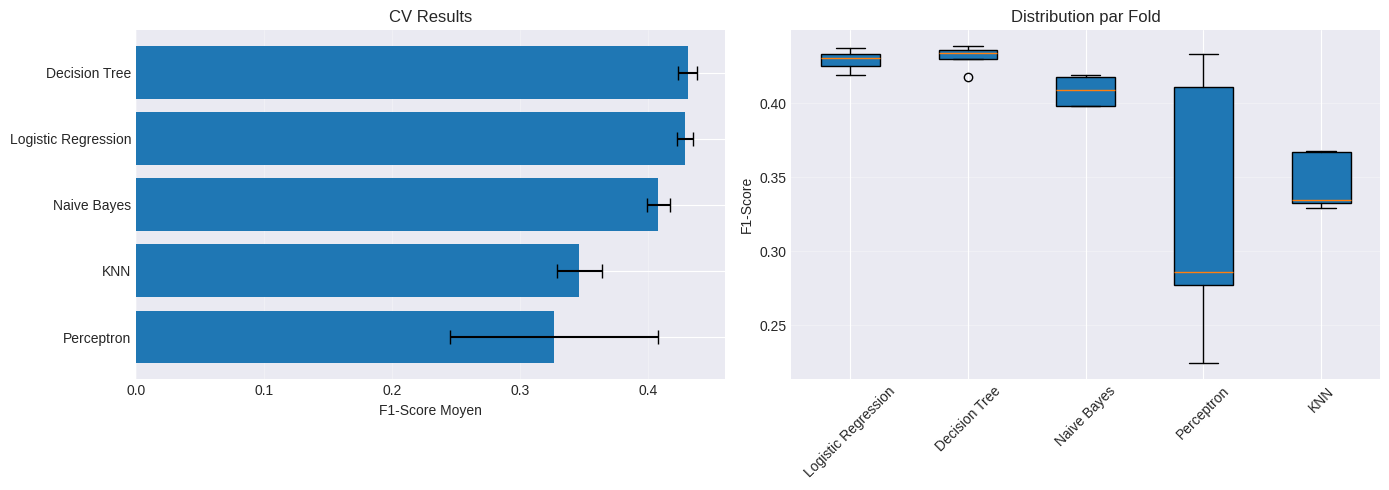

In [70]:
# visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barres avec écart type
data = cv_df.sort_values('F1 Moyen', ascending=True)
axes[0].barh(data['Modèle'], data['F1 Moyen'], xerr=data['Std'], capsize=5)
axes[0].set_xlabel('F1-Score Moyen')
axes[0].set_title('CV Results')
axes[0].grid(axis='x', alpha=0.3)

# Boxplot
scores_data = [cv_results[i]['Scores'] for i in range(len(cv_results))]
names = [cv_results[i]['Modèle'] for i in range(len(cv_results))]

axes[1].boxplot(scores_data, labels=names, patch_artist=True)
axes[1].set_ylabel('F1-Score')
axes[1].set_title('Distribution par Fold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

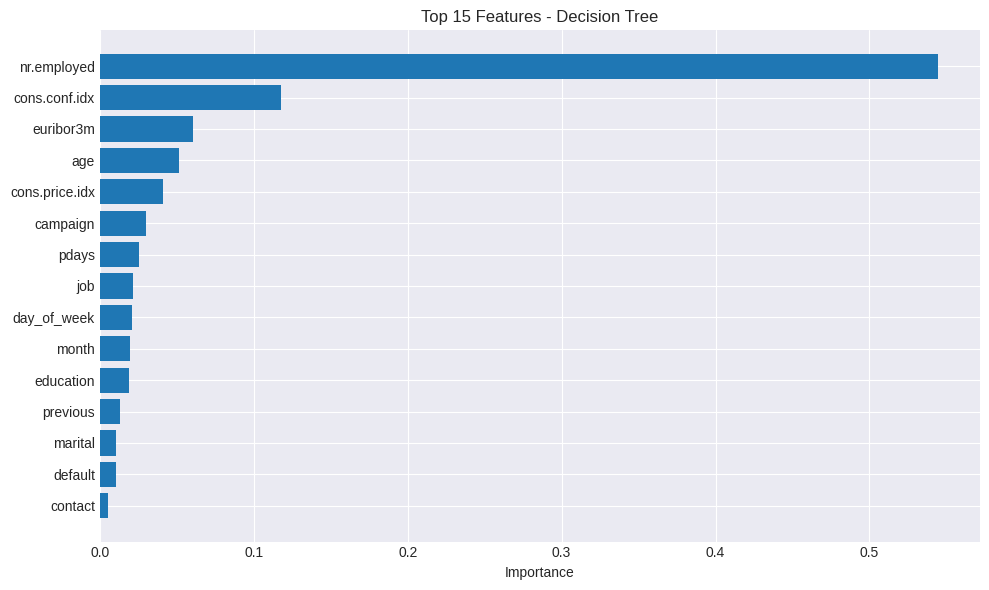

Features les plus importantes : ['nr.employed', 'cons.conf.idx', 'euribor3m', 'age', 'cons.price.idx']


In [69]:
# Importance des features avec Decision Tree
dt_model = trained_models['Decision Tree']
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance['Importance'].values)
plt.yticks(range(len(importance)), importance['Feature'].values)
plt.xlabel('Importance')
plt.title('Top 15 Features - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Features les plus importantes :", importance['Feature'].head(5).tolist())

## 8. Conclusions

### Résultats

Le **Decision Tree** donne les meilleurs résultats avec un bon équilibre Precision/Recall et une bonne interprétabilité.

**Comparaison :**
- **Decision Tree** : Meilleures perfs, facile à interpréter
- **Régression Logistique** : Bon modèle de référence, rapide
- **KNN** : Correct mais lent
- **Naive Bayes** : Rapide mais hypothèse d'indépendance limitante
- **Perceptron** : Performances plus faibles

### Points importants

**Variables influentes :**
- Indicateurs économiques (euribor3m, nr.employed)
- Historique contacts (pdays, poutcome)
- Mois de contact

**Problèmes rencontrés :**
- Classes déséquilibrées (88% no / 11% yes)
- Valeurs "unknown" dans certaines variables
- Variable "duration" exclue (pas dispo avant l'appel)

### Améliorations possibles

- Optimiser les hyperparamètres (grid search)
- Feature engineering (interactions, transformations)
- Tester d'autres modèles (Random Forest, XGBoost)
- Techniques de rééquilibrage (SMOTE, undersampling)
- Ajuster le seuil de décision selon le contexte métier

### Recommandations

- Cibler les clients avec haute probabilité
- Considérer le timing (mois, contexte économique)
- Utiliser l'historique des contacts
- Monitorer les performances en production

Le Decision Tree est un bon choix pour ce problème grâce à ses performances et son interprétabilité.